In [1]:
import os
from ultralytics import YOLO

import torch
print(torch.backends.mps.is_available())  # Should return True

True


In [2]:
# Check for MPS support and set device
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [3]:
# Load the YOLOv8 model (Nano version is fast and good for small datasets)
model = YOLO('yolov8n.pt')  # Pre-trained Nano model

In [4]:

data_config = os.path.join('datasets', 'data.yaml')
# Train the model
result = model.train(data=data_config, epochs=2, imgsz=64, device=device, batch=2)

Ultralytics 8.3.66 🚀 Python-3.12.0 torch-2.7.0.dev20250122 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/data.yaml, epochs=2, time=None, patience=100, batch=2, imgsz=64, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

train: Scanning /Users/sebastiansukiennik/Desktop/dudus/datasets/train/labels.cache... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:00<?, ?it/s]
/Users/sebastiansukiennik/.pyenv/versions/snuig/lib/python3.12/site-packages/torch/utils/data/dataloader.py:682: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /Users/sebastiansukiennik/Desktop/dudus/datasets/valid/labels.cache... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs/detect/train11
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2     0.142G      2.901      4.314      1.533         25         64: 100%|██████████| 1814/1814 [05:57<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [02:47<00:00,  1.50it/s]


                   all       1001       1891      0.579     0.0583     0.0321     0.0154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      1.62G      2.642      3.379      1.365          9         64: 100%|██████████| 1814/1814 [05:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [01:19<00:00,  3.17it/s]


                   all       1001       1891      0.587     0.0538     0.0456     0.0226

2 epochs completed in 0.252 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.66 🚀 Python-3.12.0 torch-2.7.0.dev20250122 MPS (Apple M1 Pro)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 251/251 [00:40<00:00,  6.23it/s]


                   all       1001       1891      0.587     0.0538     0.0456     0.0226
                  Mask         77         90          0          0     0.0278    0.00964
                   can         18         20          1          0          0          0
             cellphone         61         71          0          0     0.0467     0.0164
           electronics         27         40          1          0    0.00272   0.000272
               gbottle         36         82          1          0    0.00416    0.00145
                 glove         37         55          1          0     0.0196    0.00783
                 metal         10         22          1          0          0          0
                  misc         48         51          1          0     0.0124    0.00414
                   net        146        148      0.197      0.284      0.109     0.0381
                  pbag        290        330      0.436      0.512      0.397      0.234
               pbottl

In [13]:

# Evaluate the model's performance on the validation set
# metrics = model.val(data=data_config)
# print(metrics)


# Load the trained model
model = YOLO('runs/detect/train11/weights/best.pt')  # Path to the trained model weights

image_path = './datasets/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg'
# Perform inference
results = model.predict(source=image_path, conf=0.1, save=True)


image 1/1 /Users/sebastiansukiennik/Desktop/dudus/datasets/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg: 64x64 1 net, 6.6ms
Speed: 0.4ms preprocess, 6.6ms inference, 0.6ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/predict3


### Test on base YOLO

In [ ]:
model = YOLO("yolov8n.pt") 

# Use the model to detect object
result_predict = model.predict(source=image_path, conf=0.1, save=True)


image 1/1 /Users/sebastiansukiennik/Desktop/dudus/datasets/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg: 640x640 1 umbrella, 92.2ms
Speed: 2.4ms preprocess, 92.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


## R-CNN

In [8]:
import torch

from torchvision.models.detection import fasterrcnn_resnet50_fpn

from torchvision.transforms import functional as F

from PIL import Image
 

# On macOS M1/M2, use MPS if available
if torch.backends.mps.is_available():
    device = torch.device("mps")

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "images"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "labels"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "images", self.imgs[idx])
        box_path = os.path.join(self.root, "labels", self.masks[idx])
        img = read_image(img_path)
        
        
        # # first id is the background, so remove it
        # obj_ids = obj_ids[1:]
        # num_objs = len(obj_ids)

        
        # get bounding box coordinates for each mask
        ids = []
        boxes = []
        
        with open(box_path, "r") as f:
            for line in f.readlines():
                obj = line.split()
                ids.append(int(obj[0]))
                temp = list(map(float, obj[1:]))
                temp[2] += temp[0]
                temp[3] += temp[1]
                boxes.append(temp)
                
                

        # image_id = idx

        np_boxes = torch.as_tensor(boxes, dtype=torch.float32)
        area = (np_boxes[:, 3] - np_boxes[:, 1]) * (np_boxes[:, 2] - np_boxes[:, 0])
        is_crowd = torch.zeros((len(boxes),), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        img = torch.tensor(img, dtype=torch.float32)

        target = {}
        target["boxes"] = tv_tensors.BoundingBoxes(boxes, format=tv_tensors.BoundingBoxFormat.XYWH, canvas_size=F.get_size(img))
        target["labels"] = torch.tensor(ids)
        # target["image_id"] = idx
        # target["area"] = area
        # target["iscrowd"] = is_crowd


        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [10]:
def collate(batch):
    
    images = [batch_item[0] for batch_item in batch]
    images = torch.stack(images, dim=0)
    targets = [batch_item[1] for batch_item in batch]
    return images, targets

In [11]:
# from torch.utils.data._utils.collate import collate
from torchvision.transforms import v2

# Switch the model to training mode
model.train()
model.to(device)

# Create a DataLoader from the dataset named 'data' (replace with your own dataset object)
dataset = PennFudanDataset(root='datasets/train', transforms=v2.Compose([v2.ToDtype(torch.float, scale=True), v2.ToTensor()]))
# dataset = PennFudanDataset(root='datasets/train', transforms=None)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=False, collate_fn=collate)

/Users/sebastiansukiennik/.pyenv/versions/snuig/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
# Define an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    for images, targets in train_loader:
        # Move to device
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        # Forward pass
        loss_dict = model(images, targets)
        total_loss = sum(loss for loss in loss_dict.values())

        # Backpropagation
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

print("Training completed.")

/var/folders/zl/2j8hfjw54ks5_8wbg_vxj07c0000gn/T/ipykernel_65657/3104510403.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float32)
Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13XFamilyCommandBuffer: 0x3c1d89780>
    label = <none> 
    device = <AGXG13XDevice: 0x13ce88e00>
        name = Apple M1 Pro 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x13ce9de00>
        label = <none> 
        device = <AGXG13XDevice: 0x13ce88e00>
            name = Apple M1 Pro 
    retainedReferences = 1


In [19]:
t1 = next(iter(train_loader))

model.eval()
model.to('cpu')
pred = model(t1[0].to('cpu'))
pred

/var/folders/zl/2j8hfjw54ks5_8wbg_vxj07c0000gn/T/ipykernel_66495/3104510403.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float32)


[{'boxes': tensor([[  0.,   0., 416., 416.],
          [  0.,   0., 416., 416.]], grad_fn=<StackBackward0>),
  'labels': tensor([ 1, 67]),
  'scores': tensor([1., 1.], grad_fn=<IndexBackward0>)},
 {'boxes': tensor([[  0.,   0., 416., 416.],
          [  0.,   0., 416., 416.]], grad_fn=<StackBackward0>),
  'labels': tensor([67,  1]),
  'scores': tensor([1., 1.], grad_fn=<IndexBackward0>)}]

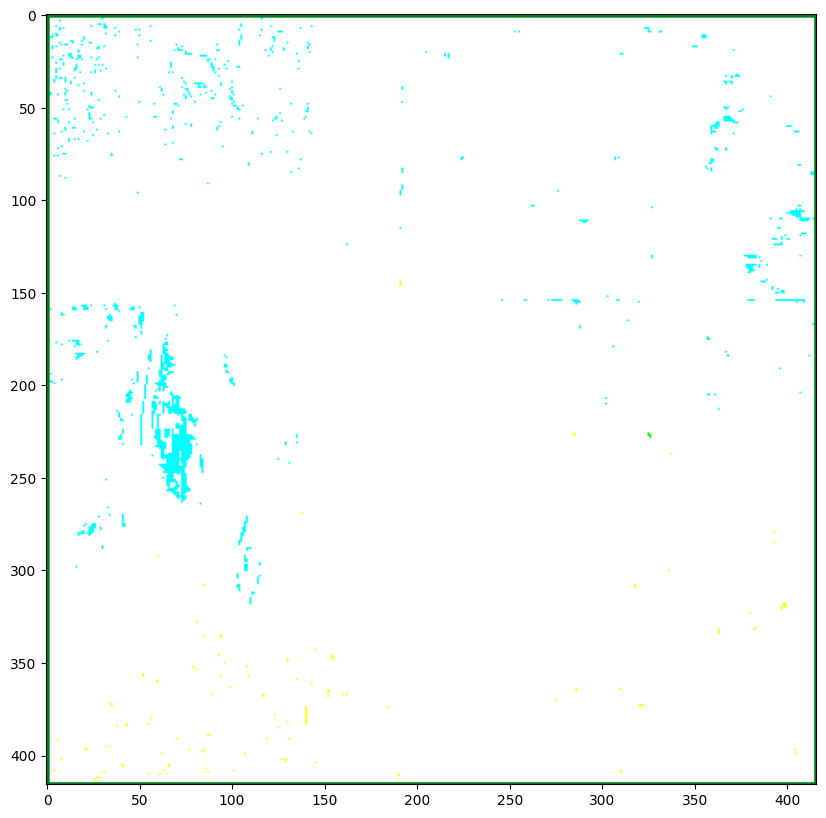

In [28]:
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt


output = draw_bounding_boxes(t1[0][0], pred[0]['boxes'], width=2)
plt.figure(figsize=(10, 10))
plt.imshow(output.permute(1, 2, 0))

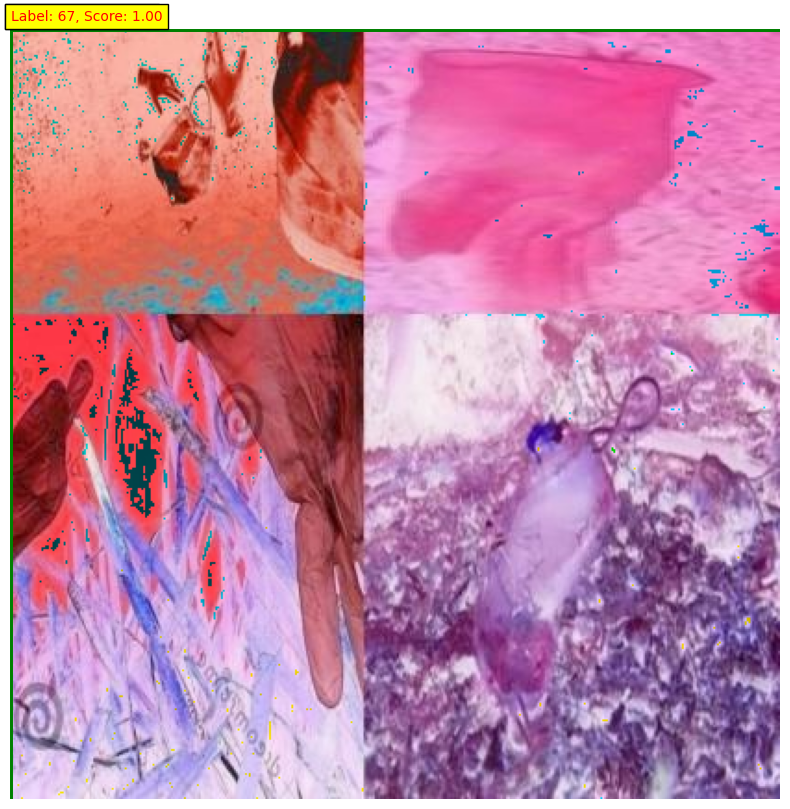

In [31]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from matplotlib.patches import Rectangle

# Extract the first image and its predictions
image = t1[0][0]  # First image in the batch
pred_boxes = pred[0]['boxes'].detach().numpy()  # Bounding boxes
pred_labels = pred[0]['labels'].detach().numpy()  # Labels
pred_scores = pred[0]['scores'].detach().numpy()  # Scores

# Convert the image tensor to a NumPy array for plotting
image = TF.to_pil_image(image)  # Convert to PIL Image

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

# Draw each predicted bounding box
for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
    if score >= 0.5:  # Filter predictions by confidence threshold
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        ax.text(
            x1, y1 - 5, f"Label: {label}, Score: {score:.2f}",
            color='red', fontsize=10, bbox=dict(facecolor='yellow')
        )

# Display the image
plt.axis('off')
plt.show()